## Setup

In [1]:
%matplotlib notebook
import logging
from matplotlib import pyplot as plt
from helper import *
from austria import Austria
from ecdc import ECDC
plt.style.use('seaborn-darkgrid')
import pandas as pd


## Data

In [3]:
ecdc = ECDC()
AT = Austria()
print(dir(AT), dir(ecdc))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'altersgruppe', 'ampel', 'ampel_aktuell', 'epicurve', 'fall_zählen', 'fälle_timeline_gkz', 'plot_tägliche_erkrankungen'] ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'compact_overview', 'country_name', 'df', 'overview', 'plot_comparison', 'plot_country', 'plot_selection', 'select_country']


In [6]:
ecdc.df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [93]:
def group_by_month(df):
    grouped = ecdc.df.groupby(df.dateRep.dt.month, as_index=False).agg({'cases':('max', 'min', 'sum',latest), 'dateRep': latest,
                                                                    'deaths':('max','min','sum',latest),
                                                                    'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':latest}).sort_values(('dateRep', 'latest'))
    return grouped.iloc[:-1]

## Monthly case count

In [105]:

grouped = group_by_month(ecdc.df)
grouped.head(10)
# f, ax = plt.subplots()
# ax.plot(grouped.dateRep, grouped[('cases','latest')], label='cases', markersize=2, marker='o')
# ax.plot(grouped.dateRep, grouped[('deaths','latest')], label='deaths', markersize=2, marker='o')

# pretty_plot(ax,log=False)


cases                          dateRep deaths                       \
      max   min      sum latest     latest    max   min     sum latest   
11     27     0       27      0 2019-12-31      0     0       0      0   
0    1980     0     9799      0 2020-01-01     43     0     213      0   
1   15141     0    75422      0 2020-02-01    254     0    2708      0   
2   21595    -9   723717      1 2020-03-21    971     0   35802      0   
3   48529  -713  2339582      1 2020-04-01   4928     0  189176      0   
4   33955 -2461  2891996      0 2020-05-01   2353 -1918  140143      0   
5   54771  -766  4249522      4 2020-06-01   2437   -31  134069      0   
6   78427  -110  7067515     17 2020-07-01   3887    -3  166196      0   
7   78761 -1385  7963815     77 2020-08-01   3935  -443  178617     14   
8   97894 -8261  8456244     85 2020-09-01   3800     0  162170      6   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
                                                       latest  
11                                                NaN          
0                                                 NaN          
1                                            0.005183          
2                                                 NaN          
3                                                 NaN          
4                                            0.068280          
5                                            0.901302          
6                                            1.345126          
7                                           11.942257          
8                                            8.118550

## Weekly case count

<IPython.core.display.Javascript object>


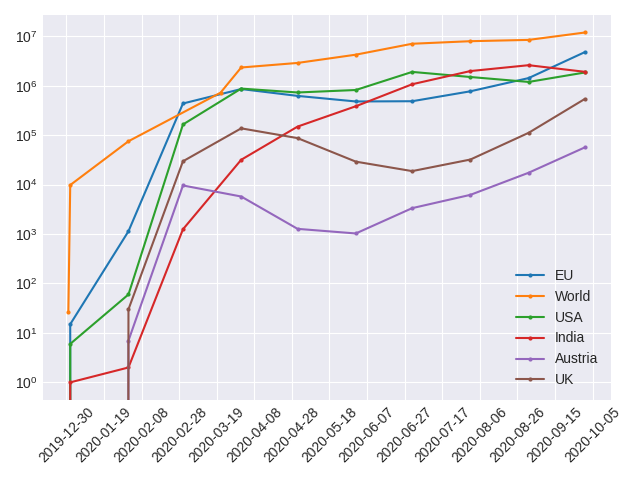

In [81]:
f, ax = plt.subplots()
selections = {'EU': ecdc.df[ecdc.df.continentExp=='Europe'],
              'World': ecdc.df,
              'USA':ecdc.select_country('US') ,
              'India': ecdc.select_country('IN'),
              'Austria': ecdc.select_country('AT'),
              'UK':ecdc.select_country('UK'),
    }
for label, df in selections.items():
    grouped = group_by_month(df)
    ax.plot(grouped.dateRep, grouped[('cases','sum')], label=label, markersize=2, marker='o')
    
pretty_plot(ax, log=True)

In [ ]:
dateRep